# INF8111 - Fouille de données


## TP1 ETE 2025 - Préparation de données




### Instructions de remise

#### Membres de l'équipe :
    - Mathieu Brulotte (2144294) 1
    - Nom (Matricule) 2
    - Nom (Matricule) 3

#### Numéro du groupe :
    - TP - Groupe #8
    
#### Livrable :

Vous devez soumettre ce notebook sur Moodle dans la boite de remise sous le nom TP1_NumeroGroupe_matricule1_matricule2_matricule3.ipynb.

**NB**: Tout travail en retard sera pénalisé d'une valeur de 10\% par jour de retard.


## Introduction et objectifs

### Importation des différents modules

In [1]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install shap

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn import linear_model
import shap

c:\Logs\Conda\envs\A2_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Lecture des données

In [3]:
df = pd.read_csv('data.csv')

Le but de ce notebook est d'effectuer le prétraitement du dataset [HousePricePrediction](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) qui pourra être par la suite être utilisé pour entraîner un modèle de prédiction de prix de maisons.

## Préparation des données

Plusieurs étapes sont nécessaires pour préparer un dataset pour la fouille des données
- **Nettoyage des données** :
    - Suppression des attributs inutiles
    - Gestion des valeurs manquantes
    - Gestion des valeurs aberrantes
- **Transformation des données** :
    - Encodage des données
    - Normalisation des données
- **Sélection des attributs** :
    - Suppression des attributs les plus fortement corrélés

<a id="exploration-des-donnees"></a>
## 1. Exploration des données (5 points)

Nous vous avons fourni le fichier *data.csv* avec l'exécution de la deuxième cellule. Il contient l'ensemble des données. Chaque ligne contient les données d'une vente. La description des attributs du dataset est la suivante:

| # | Feature Name | Description |
|---|--------------|-------------|
| 1 | Id           | Numéro de vente / To count the records. |
| 2 | MSSubClass   | Type de logement / Identifies the type of dwelling involved in the sale. |
| 3 | MSZoning     | Zonage / Identifies the general zoning classification of the sale. |
| 4 | LotArea      | Superficie du logement / Lot size in square feet. |
| 5 | LotConfig    | Configuration du logement / Configuration of the lot |
| 6 | BldgType     | Type de logement / Type of dwelling |
| 7 | OverallCond  | Etat général / Rates the overall condition of the house |
| 8 | YearBuilt    | Année de contruction / Original construction year |
| 9 | YearRemodAdd | Année de rénovation / Remodel date (same as construction date if no remodeling or additions). |
| 10| Exterior1st  | Type de revêtement extérieur / Exterior covering on house |
| 11| BsmtFinSF2   | Surface de vie / Type 2 finished square feet. |
| 12| TotalBsmtSF  | Surface totale de la base / Total square feet of basement area |
| 13| SalePrice    | Prix de vente à prédire / To be predicted |

On visualise le dataset pour avoir une idée de ce qu'il contient et des prétraitements à effectuer.

### 1.1 - Question 1 (2.5 points)

**Combien d'éléments contient le dataset ? Quelles sont les types des attributs du dataset ?**

In [4]:
print(f"Le dataset contient {len(df)} lignes et {len(df.columns)} colonnes")
print("Les types des colonnes sont les suivantes :")
for i, j in enumerate(df.dtypes):
    print(f"{df.columns[i]} : {j}")

Le dataset contient 2919 lignes et 13 colonnes
Les types des colonnes sont les suivantes :
Id : int64
MSSubClass : int64
MSZoning : object
LotArea : int64
LotConfig : object
BldgType : object
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
Exterior1st : object
BsmtFinSF2 : float64
TotalBsmtSF : float64
SalePrice : float64


### 1.2 - Question 2 (2.5 points)

**Quelles sont les valeurs uniques des attributs de type `object` ?**

In [5]:
for i in df.columns:
    if df.dtypes[i] == 'object':
        print(f"Les valeurs uniques de la colonne {df[i].value_counts()}")
        print(f"Le nombre de valeurs nulles est : {df[i].isnull().sum()}")
        print()

Les valeurs uniques de la colonne MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
Le nombre de valeurs nulles est : 4

Les valeurs uniques de la colonne LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
Le nombre de valeurs nulles est : 0

Les valeurs uniques de la colonne BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64
Le nombre de valeurs nulles est : 0

Les valeurs uniques de la colonne Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64
Le nombre de valeurs nulles est : 1



### Les valeurs uniques de la colonne MSZoning
- RL         2265
- RM          460
- FV          139
- RH           26
- C (all)      25
- Name: count, dtype: int64
### Le nombre de valeurs nulles est : 4

### Les valeurs uniques de la colonne LotConfig
- Inside     2133
- Corner      511
- CulDSac     176
- FR2          85
- FR3          14
- Name: count, dtype: int64
### Le nombre de valeurs nulles est : 0

### Les valeurs uniques de la colonne BldgType
- 1Fam      2425
- TwnhsE     227
- Duplex     109
- Twnhs       96
- 2fmCon      62
- Name: count, dtype: int64
### Le nombre de valeurs nulles est : 0

### Les valeurs uniques de la colonne Exterior1st
- VinylSd    1025
- MetalSd     450
- HdBoard     442
- Wd Sdng     411
- Plywood     221
- CemntBd     126
- BrkFace      87
- WdShing      56
- AsbShng      44
- Stucco       43
- BrkComm       6
- AsphShn       2
- Stone         2
- CBlock        2
- ImStucc       1
- Name: count, dtype: int64
### Le nombre de valeurs nulles est : 1

<a id="nettoyage-des-donnees"></a>
## 2. Nettoyage des données (30 points)

<a id="suppression-des-attributs-inutiles"></a>
### 2.1 Suppression des attributs inutiles

### 2.1.1 - Question 3 (5 points)

**Pourquoi on peut supprimer l'attribut `Id` dans le cas de ce TP? Effectuez cette suppression.**

In [6]:
print("On peut supprimer la colonne 'Id' car elle n'apporte pas d'information utile pour la prédiction")
df.drop(columns=['Id'], inplace=True)

On peut supprimer la colonne 'Id' car elle n'apporte pas d'information utile pour la prédiction


<a id="gestion-des-valeurs-manquantes"></a>
### 2.2 Gestion des valeurs manquantes

Pour gérer les valeurs manquantes, plusieurs solutions s'offrent à nous :
- Remplacer par la valeur la plus fréquente (le mode)
- Remplacer par la valeur moyenne/médiane
- Suppression des lignes contenant des valeurs manquantes

Pour ce TP, nous utiliserons la dernière option car nous avons peu de valeurs manquantes.

#### 2.2.1 - Question 4 (2.5 points)

**Quels attributs contiennent des valeurs manquantes ?**

In [7]:
df.SalePrice

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914         NaN
2915         NaN
2916         NaN
2917         NaN
2918         NaN
Name: SalePrice, Length: 2919, dtype: float64

In [8]:
print("Les attributs contenant des valeurs manquantes (nulles) sont :")
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(f"{i} : {df[i].isnull().sum()} valeurs manquantes")
        print()

Les attributs contenant des valeurs manquantes (nulles) sont :
MSZoning : 4 valeurs manquantes

Exterior1st : 1 valeurs manquantes

BsmtFinSF2 : 1 valeurs manquantes

TotalBsmtSF : 1 valeurs manquantes

SalePrice : 1459 valeurs manquantes



#### 2.2.2 - Question 5 (2.5 points)

On peut alors gérer les valeurs manquantes colonne par colonne. L'attribut `SalePrice` n'est pas pris en considération car les valeurs manquantes sont justement les valeurs que nous voulons prédire.

**Supprimer les lignes contenant les valeurs manquantes. Implémentez la fonction `delete_missing_values` qui retire ces données**.

In [9]:
def delete_missing_values(dataset):
    """
    This function deletes rows whom value is missing.

    :param dataset: ensemble des données
    :return:
      dataset traité
    """
    return dataset.dropna(subset=[col for col in dataset.columns if col != 'SalePrice'])

In [10]:
df = delete_missing_values(df)

In [11]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


Les données manquantes pour la colonne `SalePrice` sont celles du dataset de test. On laisse donc ces valeurs manquantes car on veut appliquer le même prétraitement sur les données de test.

### 2.2.3 - Question 6 (10 points)

On veut néanmoins que les données d'entrainement suivent une distribution gaussienne.

**Implémenter le fonction `plot_hist`. Cette fonction doit permettre d'afficher la distribution des valeurs de l'attribut `SalePrice` ainsi que la loi normale de même moyenne et variance.**

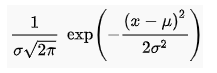
normal_dist is made to use this formula

In [ ]:
def plot_hist(prices):
    """
    Affiche la distribution du prix de vente

    :param prices: ensemble des prix.
    """
    prices = prices.dropna()

    # Histogramme des prix
    sns.histplot(prices, kde=False, bins=30, color='blue', label='Distribution des prix')

    # Valeurs de la loi normale
    x = np.linspace(prices.min(), prices.max(), 100)
    normal_dist = (1 / (np.std(prices) * np.sqrt(2 * np.pi))) * np.exp(-((x - np.mean(prices))** 2 / (2*np.std(prices)** 2)) )

    # Courbe de la loi normale
    plt.plot(x, normal_dist * len(prices) * (prices.max() - prices.min()) / 30, color='red', label='Loi normale')

    plt.xlabel('Prix de vente')
    plt.ylabel('Fréquence')
    plt.title('Distribution des prix de vente et loi normale')
    plt.legend()
    plt.show()

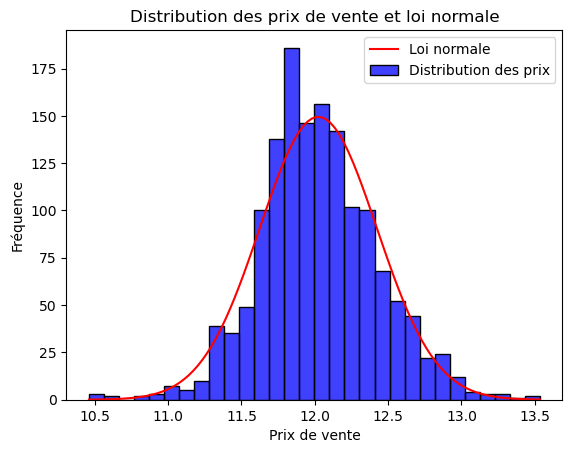

In [29]:
plot_hist(df.SalePrice)

Vous devez obtenir une distribution des valeurs de `SalePrice` proches d'une distribution normale mais légèrement asymétrique. On peut alors appliquer une transformation logarithmique pour approcher d'une distribution normale symétrique.

**Effectuer cette transformation sur notre ensemble de données.**

In [14]:
df.SalePrice = np.log1p(df.SalePrice)

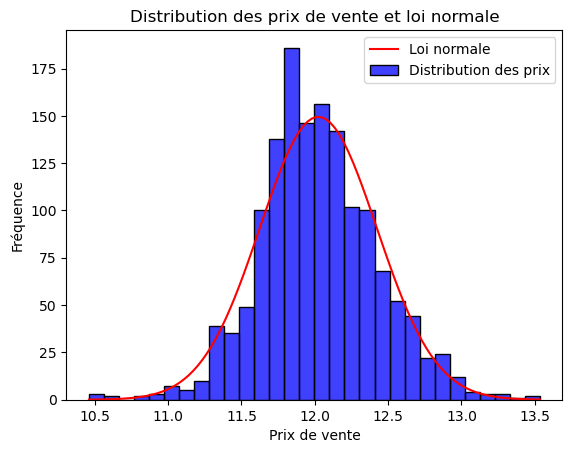

In [30]:
plot_hist(df.SalePrice)

In [31]:
# Cette copie va servir plus tard pour la question 6 (IQR)
df_order1 = df.copy()

<a id="detection-des-valeurs-aberrantes"></a>
### 2.3 Détection des valeurs aberrantes

En pratique, la méthode de détection d'une valeur aberrante nécessite de se poser les questions suivantes:
- Quelles valeurs seraient incohérentes pour chaque colonne ?
- Quelles valeurs peuvent être problématiques pour l'utilisation de ces données ? Exemple: pour une régression linéaire, on préfère avoir des valeurs distribuées suivant une loi normale.

Avec ces éléments, on peut:
- Fixer des seuils de tolérance pour les valeurs aberrantes
- Utiliser des algorithmes de détection de valeurs aberrantes (ex: clustering, IRQ, [QTest](https://plotly.com/python/v3/outlier-test/), ...)

A noter que suivant les méthodes, les valeurs détectées comme aberrantes peuvent être différentes.

La méthode IRQ fait l'objet d'une question, en fin de ce notebook.

### 2.3.1 Question 7 (10 points)

Ici comme nous allons réaliser une régression linéaire, nous allons visuellement voir si certains points s'écartent largement de la droite de régression.

On sait que l'on veut effectuer une régression linéaire pour prédire `SalePrice`. On peut donc visualiser les valeurs de chaque attribut en fonction de `SalePrice` pour détecter la présence de valeurs aberrantes.

**Implémenter la fonction `plot_line`. Elle doit permettre de visualiser la relation entre un attribut donné et `SalePrice`.**

In [33]:

def plot_line(attr):
    """
    Affiche la relation entre attr et SalePrice

    :param attr: attribut à comparer à SalePrice
    """
    plt.figure(figsize=(16, 6))
    sns.scatterplot(x=attr, y='SalePrice', data=df, color='green', alpha=0.5)
    plt.xlabel(attr)
    plt.ylabel('SalePrice')
    plt.title(f'Relation entre {attr} et SalePrice')
    plt.show()
   

**Afficher les relations de tous les attributs avec `SalePrice`. Peut-on y déceler des valeurs aberrantes ?**

Attribut : MSSubClass


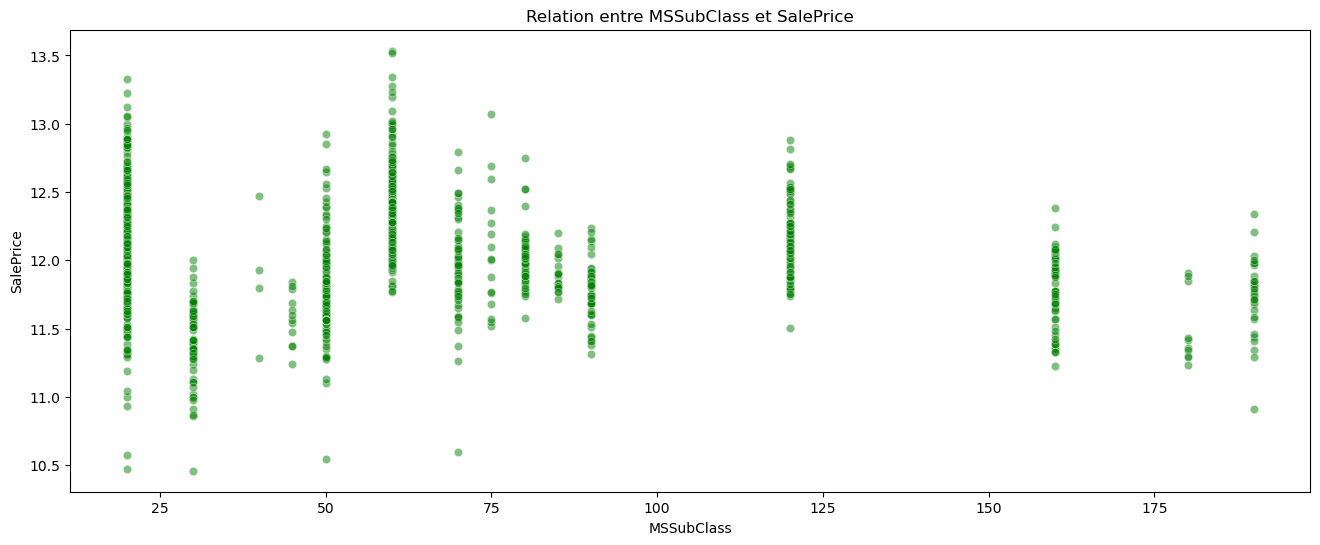

Attribut : LotArea


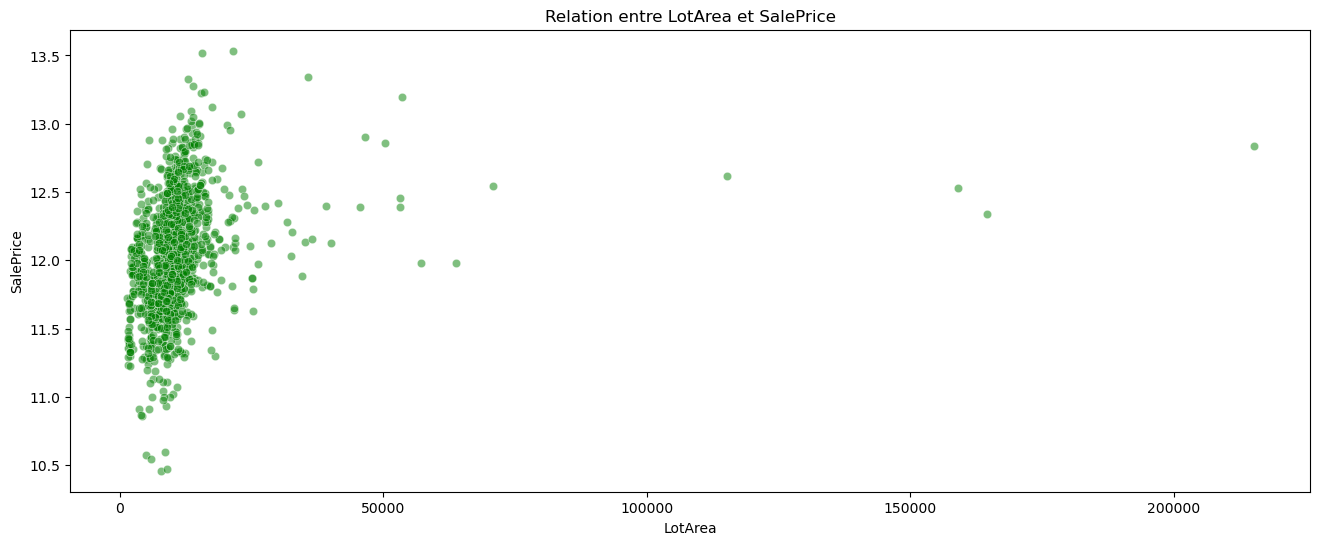

Attribut : OverallCond


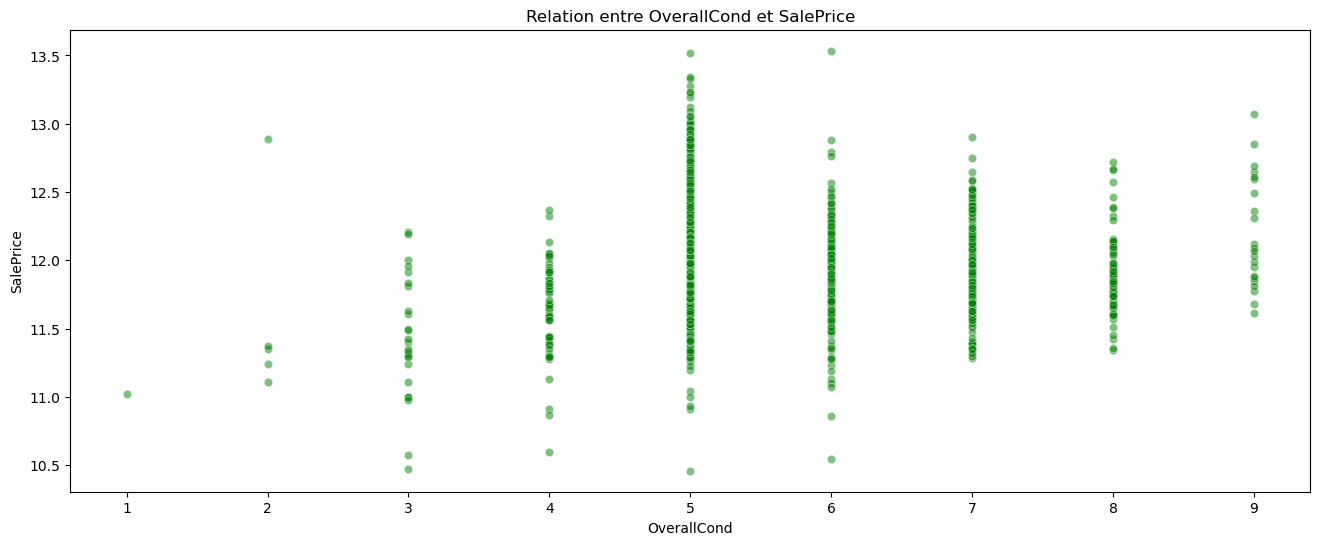

Attribut : YearBuilt


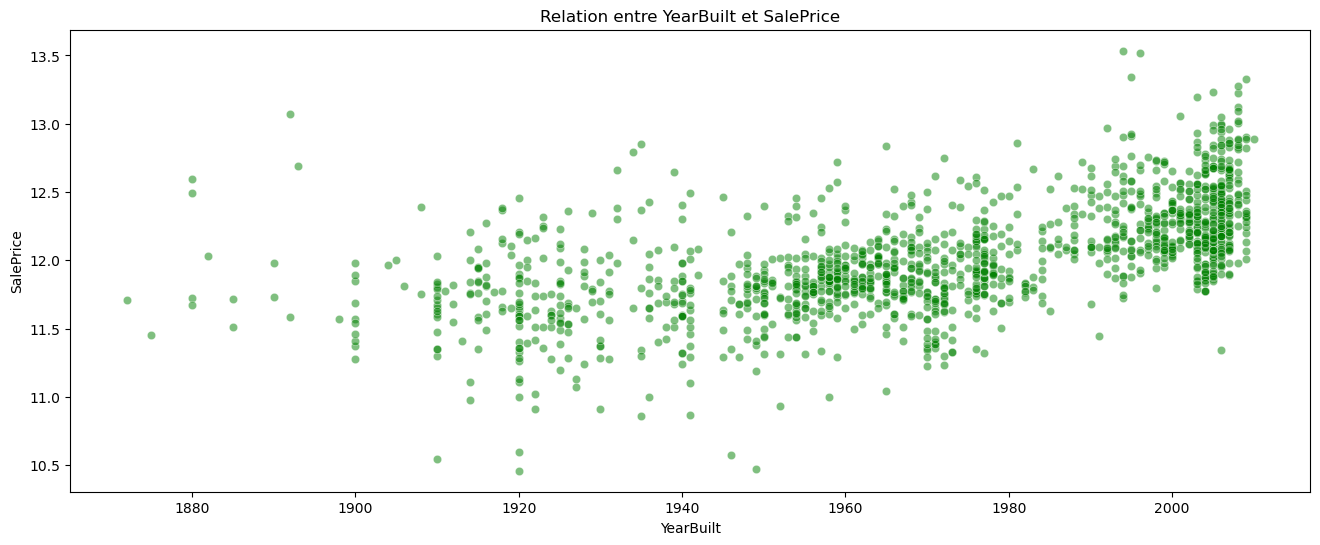

Attribut : YearRemodAdd


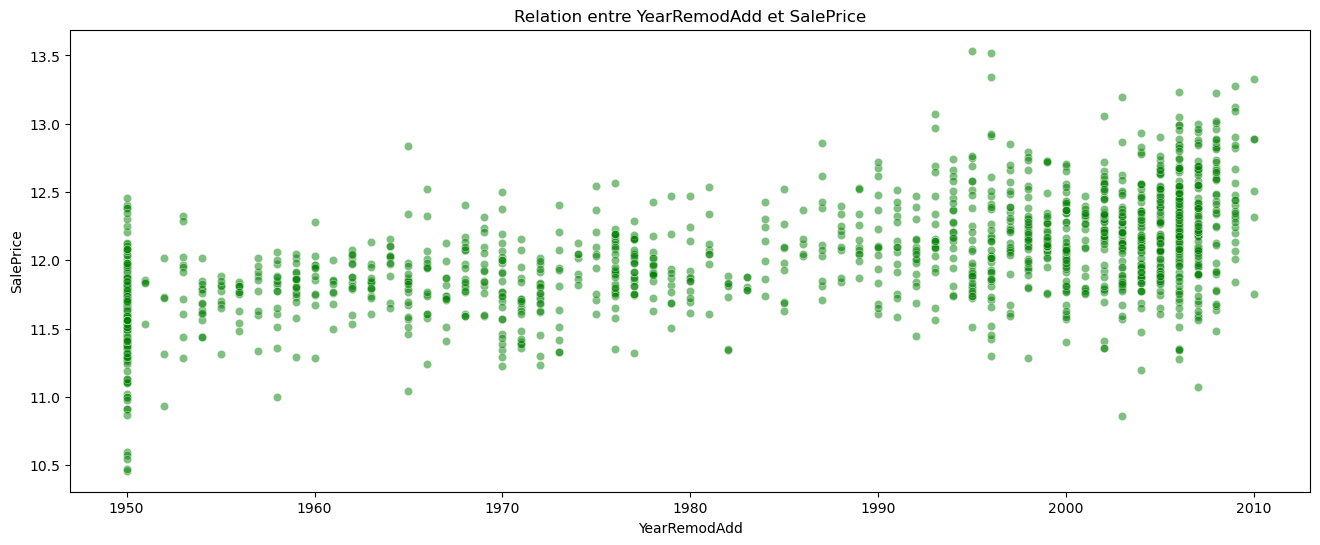

Attribut : BsmtFinSF2


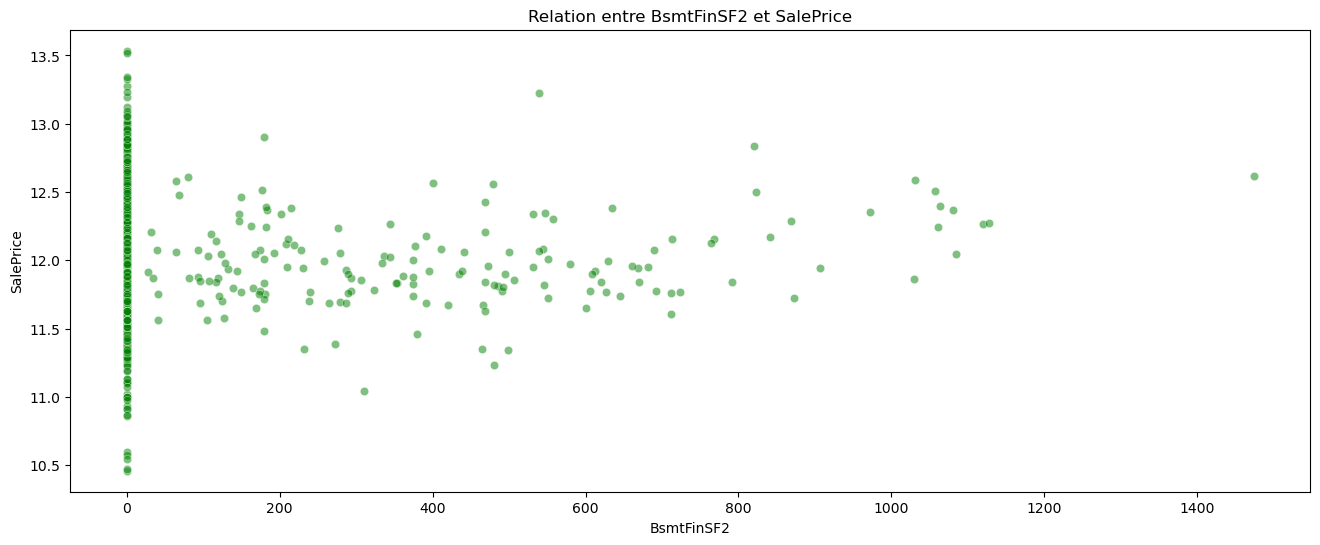

Attribut : TotalBsmtSF


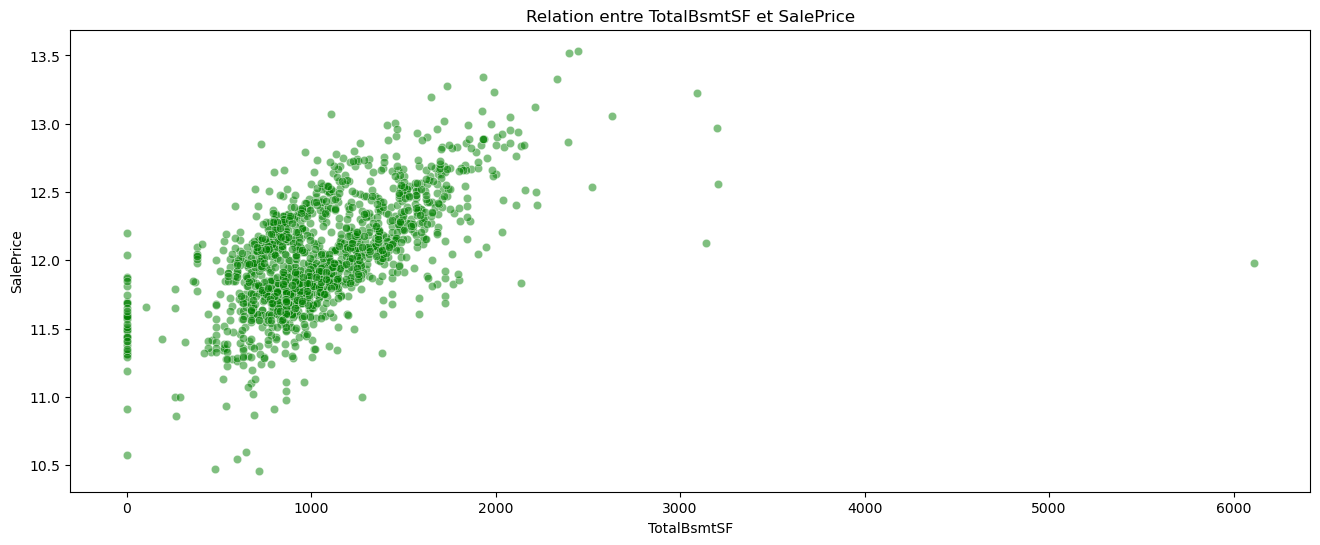

In [35]:
for i in df.columns:
    if (df[i].dtype == 'float64' or df[i].dtype == 'int64') and i != 'SalePrice':
        print(f"Attribut : {i}")
        plot_line(i)

Figure 1 : MSSubClass

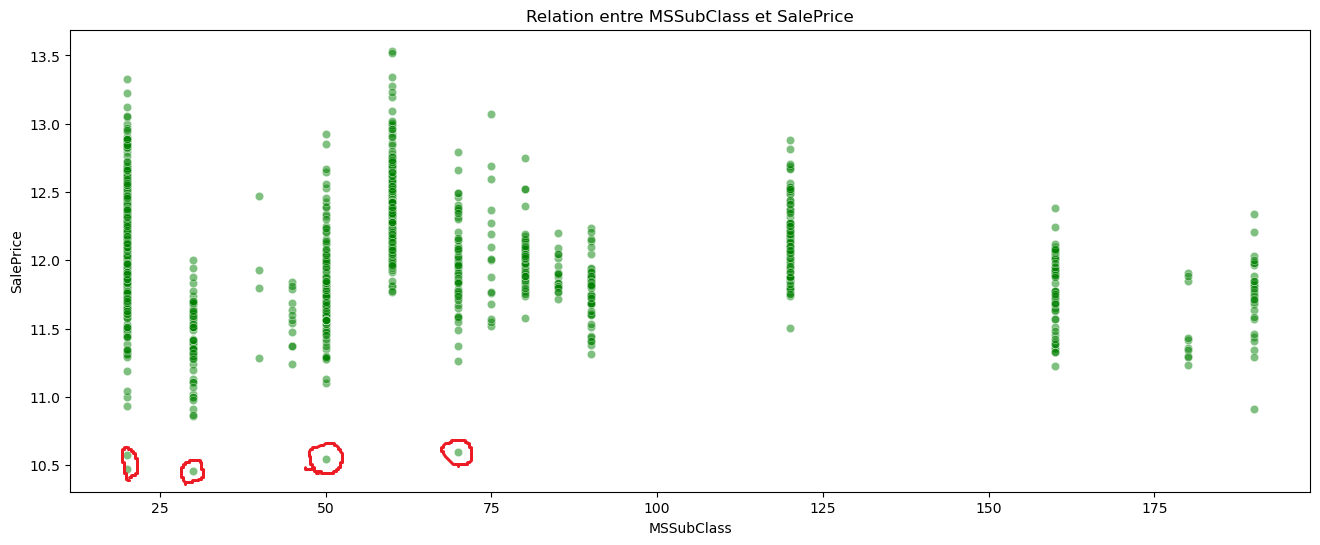


Les valeurs isolées du bas de la figure peuvent être considérées comme abérrantes

Figure 2 : LotArea

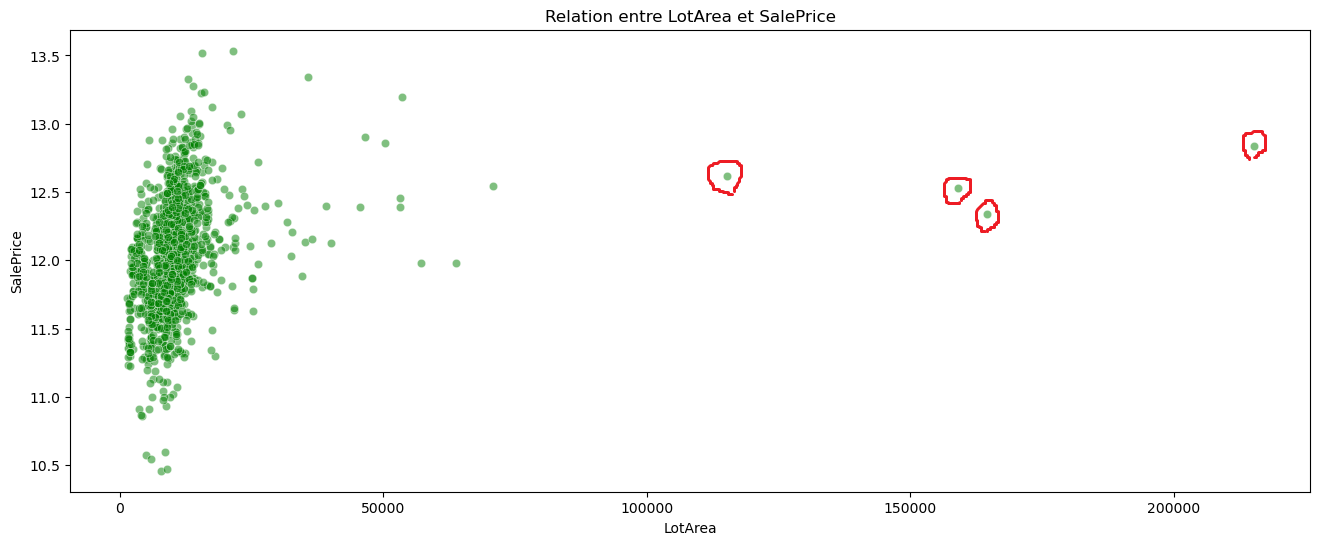

Les valeurs complètement à droite peuvent être considérées comme des valeurs abérrantes. Cependant, elles peuvent encore apporter de l'utilité mais elles sont à tellement d'ordres de magnitude de grandeur hors du dataset ordinaire qu'il faut les remarquer.

Figure 3 : OverallCond

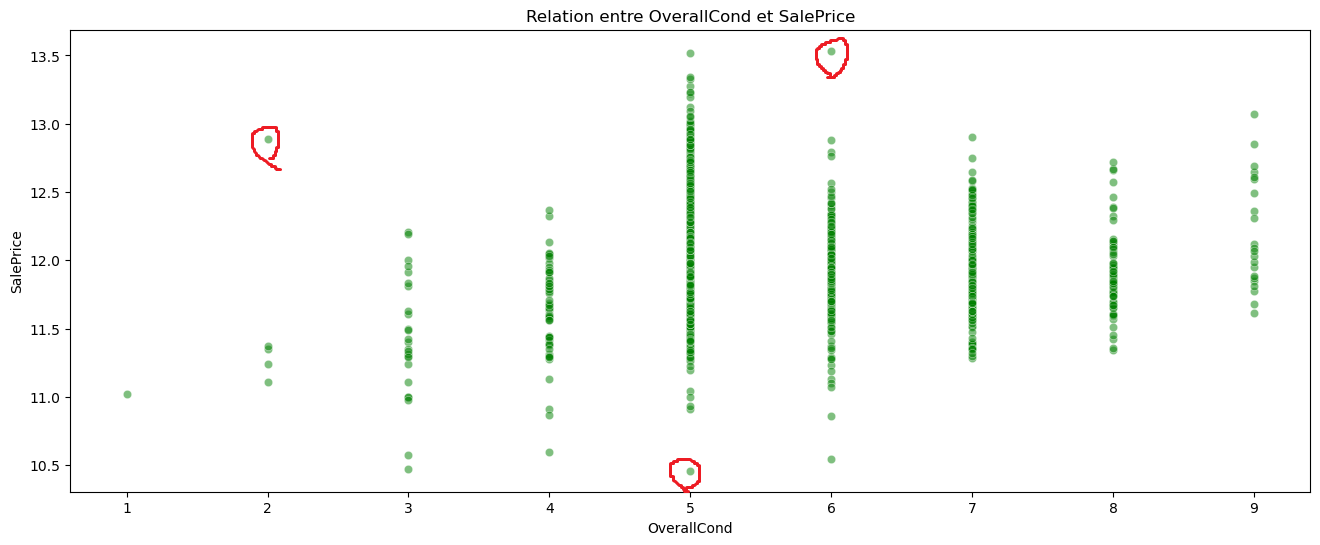

Valeurs encerclées peuvent être considérées comme abérrantes.

Figure 4 : YearBuilt

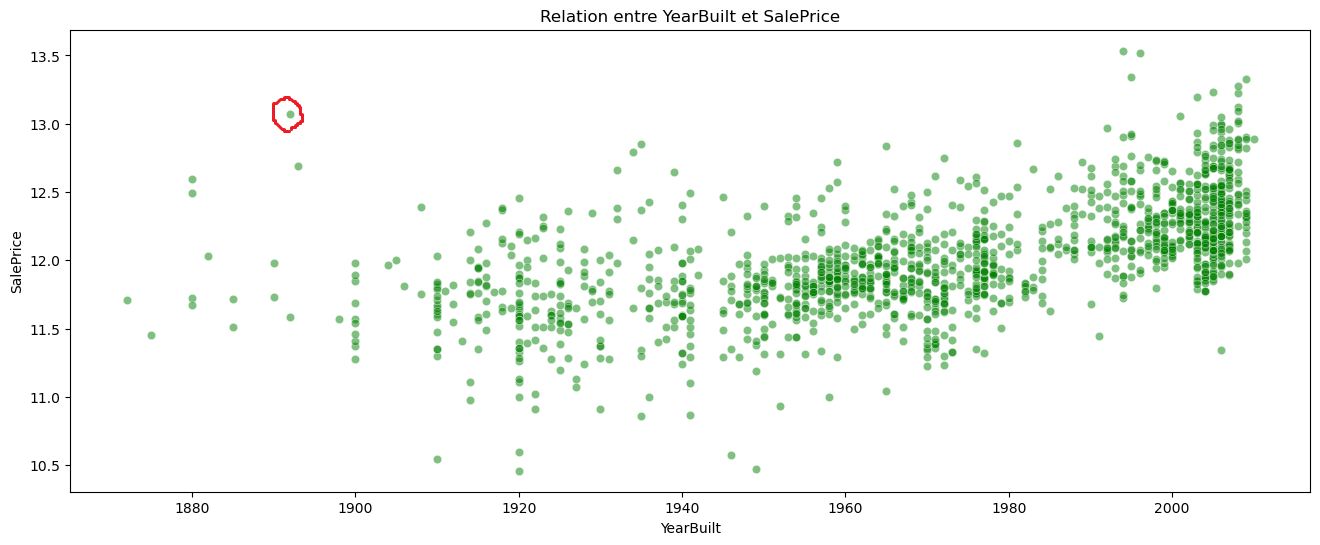

Il n'y a pas beaucoup de valeurs abérrantes pour cette catégorie mais si il y en avait une ce serait celle encerclée.

Figure 5 : YearRemodAdd

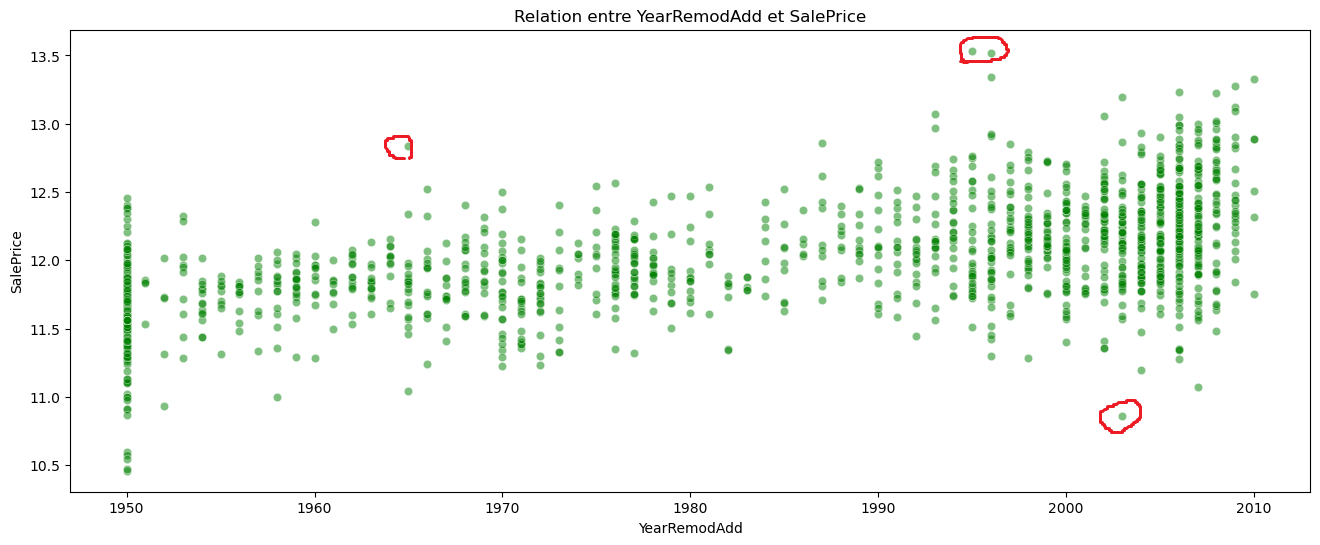

Voici les données les plus abérrantes de cette figure.

Figure 6 : BsmtFinSF2

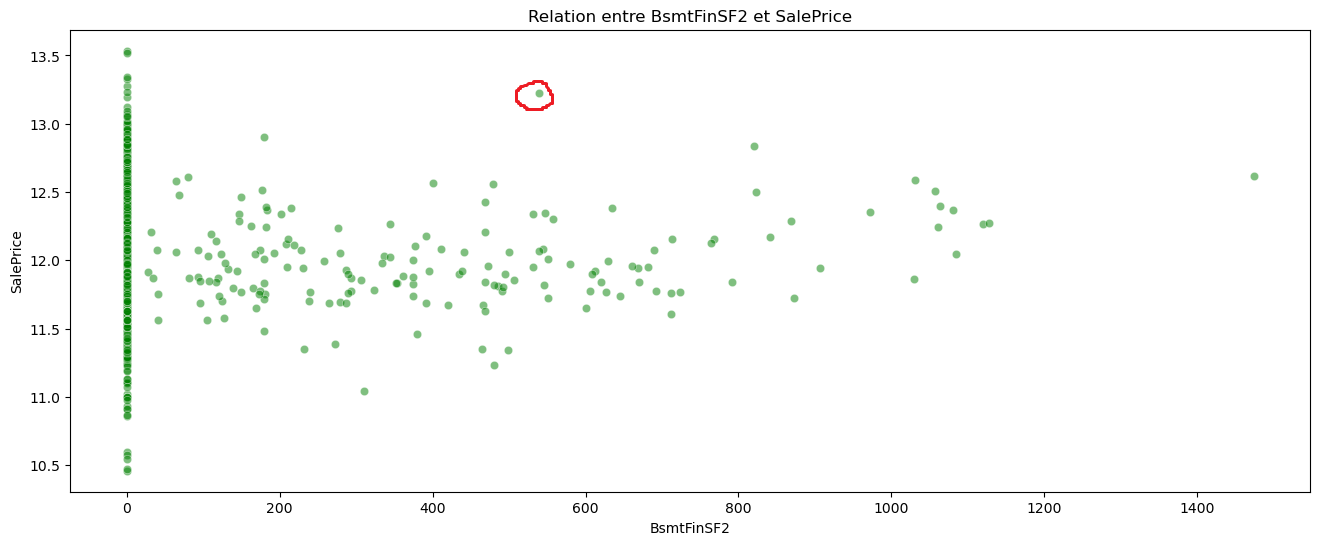 

Ici il y a peut-être une valeur abbérante mais ce qui est intéressant, c'est que les valeurs nulles qui on dirait ont été causées par un sous-sol non fini on été remplacées par 0, et donc il y a un grand amas de 0s à plusieurs échelles du SalePrice.

Figure 7 : TotalBsmtSF

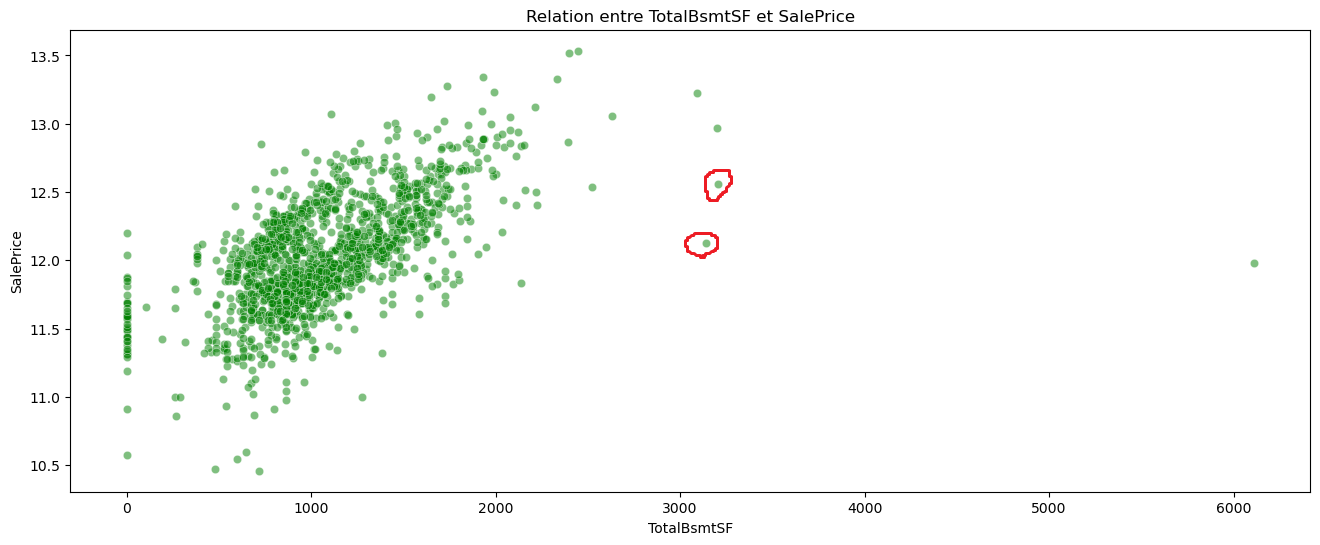

Les valeurs encerclées sont dans l'ensembles celles qui s'éloignent le plus de la trajectoire. Il y  a un même effet que pour la question précédente avec un amas de 0s pour les exemples sans sous-sol.

**À ce stade, il s'agit uniquement de détecter la présence éventuelle de valeurs aberrantes dans les données.**
**Aucune action de traitement ou de remplacement n'est demandée pour le moment**

## 3. Transformation des données (10 points)

### 3.1 Encodage des attributs de type `object`

Les attributs de type `object` étant catégoriques (voire partie 1), on peut effectuer un `one hot encoding` de ces attributs. `Pandas` permet d'effectuer cela avec la fonction `get_dummies()`. Cela nous permettra d'obtenir un dataset contenant uniquement des attributs de type `int` ou `float`.


#### 3.1.1 Question 8 (5 points)

**Encodez les attributs de type `object` avec un `one hot encoding`**

In [40]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,12.247699
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,12.109016
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,12.317171
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,11.849405
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [ ]:
#TODO

def encode_categorical_features(dataset):
    # Sélectionner les colonnes de type 'object'
    categorical_cols = dataset.select_dtypes(include=['object']).columns

    dataset_encoded = pd.get_dummies(dataset[categorical_cols], drop_first=True)

    # Concaténation des colonnes encodées avec le reste du dataset
    dataset = dataset.drop(categorical_cols, axis=1)
    dataset_encoded = pd.concat([dataset, dataset_encoded], axis=1)
    # Remplace les True/False par 1/0
    dataset_encoded = dataset_encoded.astype({col: 'int' for col in dataset_encoded.select_dtypes(include=[bool]).columns})
    return dataset_encoded

df=encode_categorical_features(df)

### 3.2 Normalisation des données

Pour faciliter l'entraînement du modèle, on peut normaliser les données. `sklearn` permet d'effectuer cela avec les fonctions suivantes :

*   `StandardScaler()` normalise les données en soustrayant la moyenne et en divisant par l'écart-type
*   `MinMaxScaler()` normalise les données en les ramenant entre 0 et 1.

Dans la suite de ce TP, nous utiliserons la fonction `StandardScaler()`.

In [48]:
# A utiliser dans la partie 5.2
mu_sale_price = df["SalePrice"].mean()
sigma_sale_price = df["SalePrice"].std()

#### 3.2.1 Question 9 (5 points)

**Implémenter la fonction `normalize`. Elle doit réaliser la normalisation des données.**

In [50]:
def normalize(dataset):
    """
    Normalise les données du dataset.

    :param dataset: ensemble des données
    :return:
      dataset traitée
    """
    scaler = preprocessing.StandardScaler()
    dataset_scaled = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
    return dataset_scaled
df=normalize(df)

In [51]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.066066,-0.215504,-0.511162,1.044791,0.895701,-0.293353,-0.447678,0.560067,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
1,-0.874430,-0.068656,2.194499,0.152334,-0.398557,-0.293353,0.475862,0.212763,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,2.342595,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2,0.066066,0.142038,-0.511162,0.978683,0.847765,-0.293353,-0.302095,0.734046,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
3,0.301189,-0.075041,-0.511162,-1.863958,-0.686170,-0.293353,-0.675151,-0.437383,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,2.474318,-0.140004
4,0.066066,0.526395,-0.511162,0.945629,0.751894,-0.293353,0.209719,1.014651,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,2.417305,-1.047299,1.292612,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2909,2.417305,-1.052662,-0.511162,-0.045990,-0.686170,-0.293353,-1.152843,NaN,-0.223848,-0.094899,...,4.703089,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004
2910,-0.874430,1.259356,1.292612,-0.376529,0.560152,-0.293353,0.389422,NaN,-0.223848,-0.094899,...,-0.212626,-0.422936,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,1.357185,-0.404152,-0.140004
2911,0.653875,0.038734,-0.511162,0.681198,0.368411,-0.293353,-0.320293,NaN,-0.223848,-0.094899,...,-0.212626,2.364423,-0.018531,-0.426877,-0.286522,-0.026212,-0.122403,-0.736819,-0.404152,-0.140004


## 4. Sélection des attributs corrélées (15 points)

### 4.1 Suppression des attributs corrélées

Pour améliorer la qualité de la prédiction, nous devons prendre en compte la corrélation entre attributs. L'objectif est donc de supprimer les attributs les plus fortement corrélées entre eux.

Pour ce faire, vous disposez des fonctions suivantes

* `corr()` de `Pandas` qui calcule la matrice de corrélation
* `heatmap()` de `seaborn` qui permet de visualiser la matrice de corrélation


#### 4.1.1 Question 10 (10 points)

**Implémenter la fonction `display_corr_matrix`. Elle doit permettre d'afficher la matrice de corrélation entre les différents attributs de nos données après normalisation des données.**

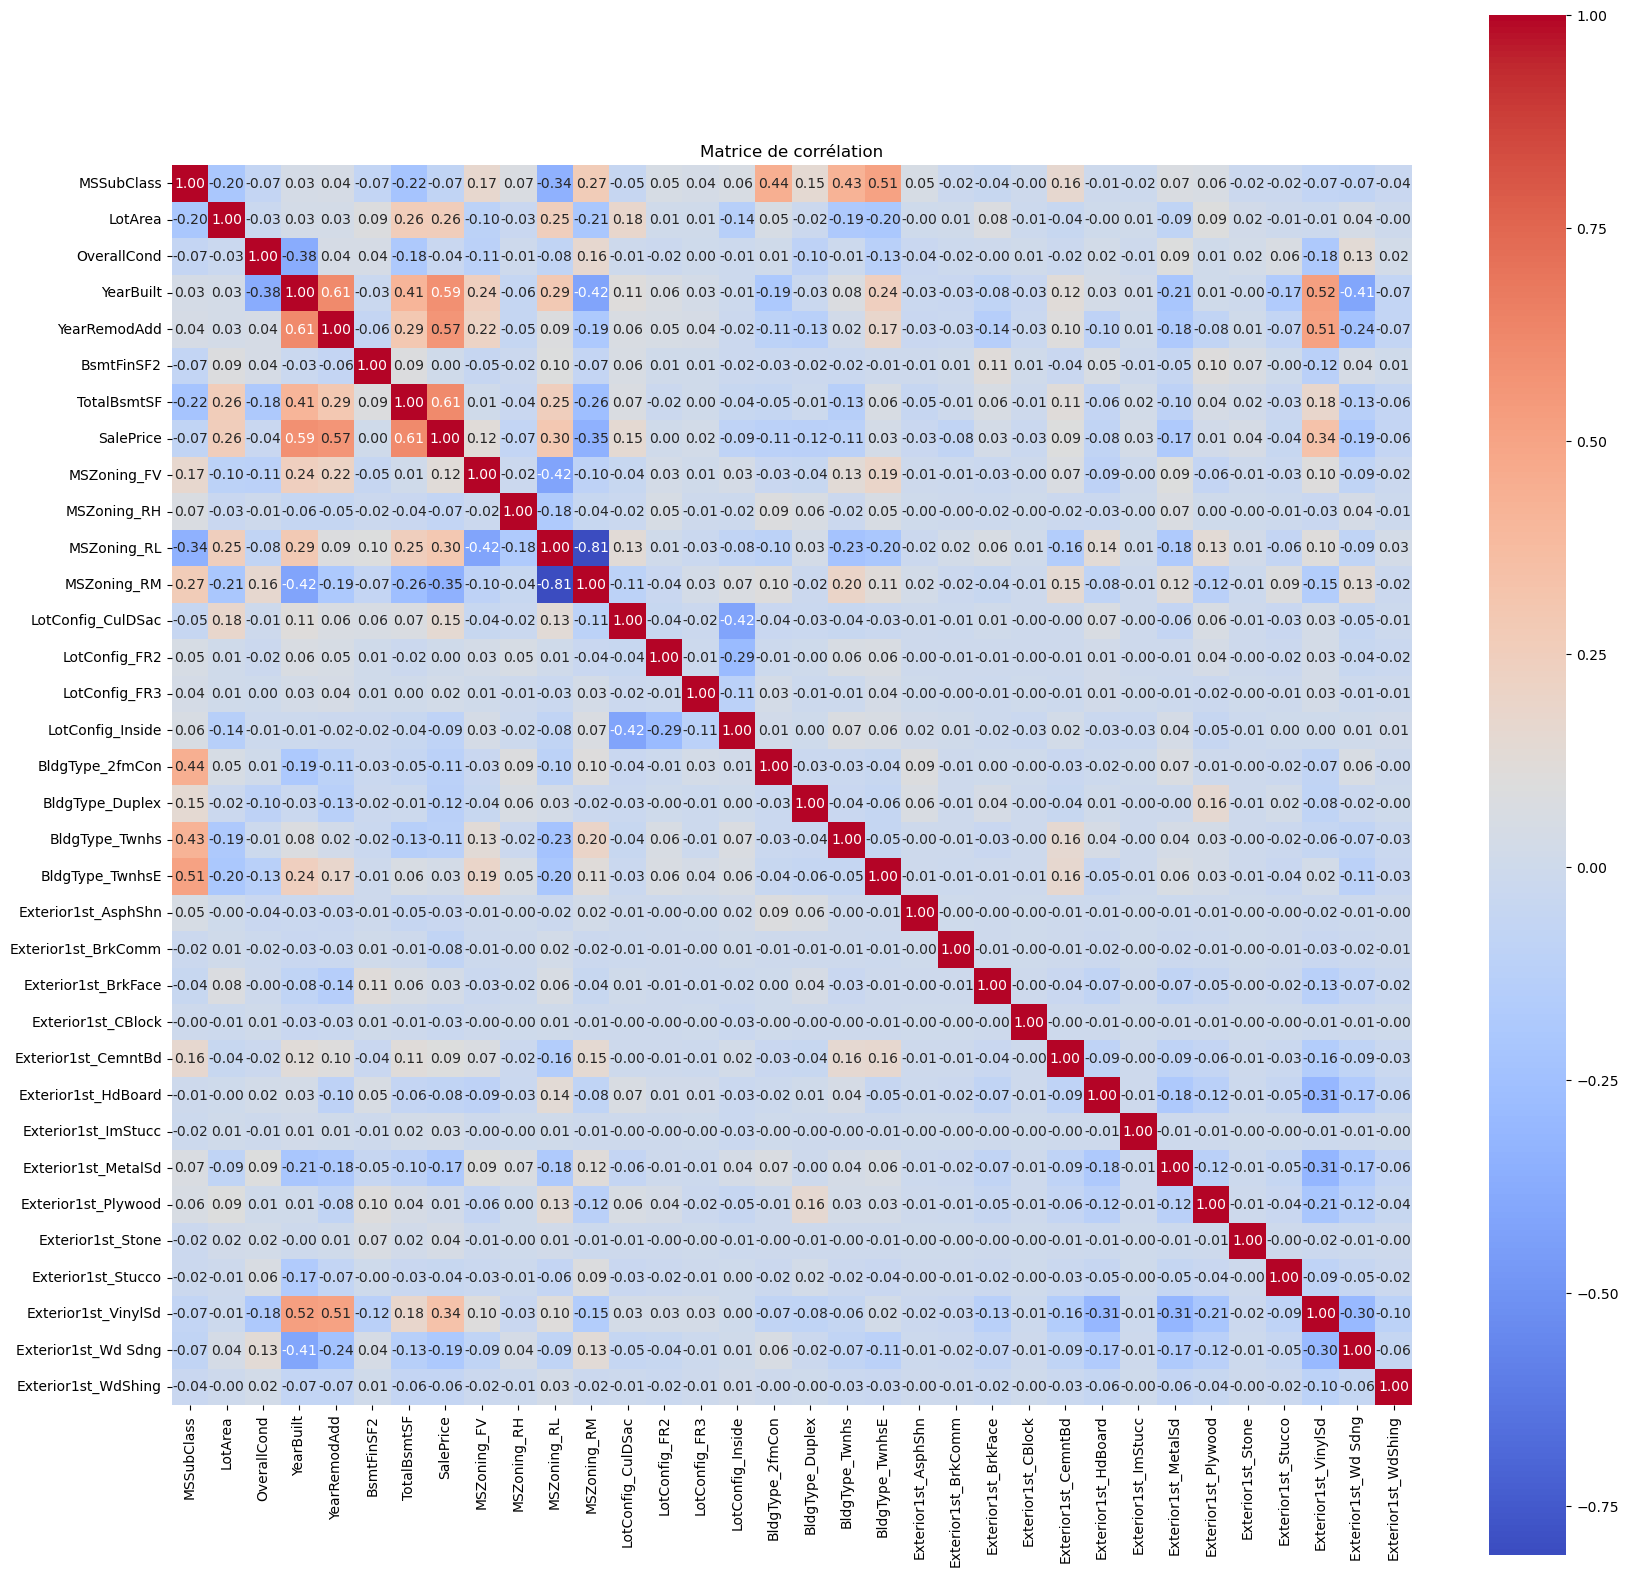

In [52]:
def display_corr_matrix(dataset):
    """
    Créer et affiche la matrice de corrélation des attributs liés au dataset.

    :param dataset: ensemble des données
    """
    corr = dataset.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Matrice de corrélation')
    plt.show()
    return corr
corr = display_corr_matrix(df)

In [ ]:
display_corr_matrix(df)

#### 4.1.2 Question 11 (5 points)

On peut alors choisir de supprimer les attributs qui sont fortement corrélées entre eux en définissant un seuil. Fixons ce seuil à 0.7.

**Quels sont les attributs fortement correlés selon le critère ci-dessus ? Supprimez ces attributs et affichez la nouvelle matrice de corrélation.**

In [ ]:
#TODO

## 5. Entrainement d'un modèle de régression linéaire (30 points)

### 5.1 Rappel du concept

La régression linéaire consiste à trouver une fonction affine qui minimise la somme des carrés des erreurs. La fonction affine est définie par la formule suivante :
$$ f(x) = \beta_0 + \beta_1^T x $$
Nous tentons de trouver les paramètres $\beta_0$ et $\beta_1$ qui minimisent $\sum_{i=1}^n (f(x_i) - y_i)^2=||y-X\beta||^2$ où $X$ est la matrice des données fournies au modèle et $y$ le vecteur des `SalePrice`.

On veut trouver le minimum de cette fonction. On va utiliser `RidgeRegression` de `sklearn` pour trouver les paramètres $\beta_0$ et $\beta_1$. Ce module utilise la méthode des moindres carrés (`numpy.linalg.lstsq`) pour trouver les paramètres $\beta_0$ et $\beta_1$.

### 5.2 Application

#### 5.2.1 Question 12 (5 points)

Après avoir effectué le prétraitement, on peut commencer par séparer les données en un ensemble d'entraînement et un ensemble de test. Pour cela, les 1460 premières lignes contiennent les données d'entrainement. On peut ainsi séparer les données en deux ensembles.

**Compléter la structure suivante afin de diviser les données en deux sous-ensembles.**

In [ ]:
#TODO
data_train = {"x": pass, "y": pass, "df": pass}
data_pred = {"x": pass, "df": pass}

#### 5.2.2 Question 13 (7.5 points)

Une fois cette séparation faite, on peut utiliser `RidgeRegression` pour effectuer la régression linéaire avec pénalisation de la norme L2.

**Compléter la fonction `ridge_regression`. Elle doit implémenter l'ensemble de la régression.**

*Pour cette question, vous devez retourner les coefficients de la regression linéaire. De plus, cette fonction doit modifier le paramètre `data_pred` en y ajoutant les valeurs prédites.*

**Remarques**:
- La fonction doit retourner un dictionnaire dont les clés sont les noms des attributs et les valeurs, les coefficients correspondants.
- Dans `data_pred`, ajoutez deux colonnes : une première contenant les prédictions (sortie du modèle), et une deuxième avec les prédictions remises à l’échelle originale des prix, en inversant la standardisation et la transformation logarithmique.

In [ ]:
def ridge_regression(data_train, data_pred):
    """
    Réaliser la prédiction selon la régression de Rigde.

    :param data_train: données d'entrainement
    :param data_pred: données de prédiction
    
    :return:
      coefficients de la régression
    """
    data_pred["y"] = #TODO
    pass

In [ ]:
 reg = ridge_regression(data_train, data_pred)
 data_pred["y"]

#### 5.2.3 Question 14 (5 points)

**À l’aide d’un histogramme, comparez la distribution des prix prédits à celle des données d’entraînement, en vous assurant que les deux sont représentées à l’échelle originale des prix (c’est-à-dire sans transformation logarithmique ni standardisation). Commentez brièvement.**

In [ ]:
#TODO

### 5.3. Sélection des attributs importants
#### 5.3.1 Question 15 (5 points)

Une fois la prédiction obtenue, on peut maintenant mesurer l'importance de chaque attribut dans la prédicition en traçant les coefficients de la régression linéaire.

**Quels sont les dix attributs ayant le plus d'impact dans la prédiction ?**


In [ ]:
#TODO

#### 5.3.2 Question 16 (7.5 points)

Cette dernière méthode n'est pas nécessairement une bonne mesure de l'importance d'un attribut. On peut utiliser la méthode SHAP (SHapley Additive exPlanations) pour effectuer la sélection des attributs.

**Les dix attributs ayant le plus d'impact dans la prédiction pour cette mesure sont-ils les mêmes que ceux de la question précédente ? Donnez une interprétation comparative de ces deux résultats**


In [ ]:
#TODO

## 6. Méthode des écarts interquartiles ou IRQ (10 points)

On peut également détecter les valeurs aberrantes en affichant un boxplot de chaque colonne. On considère les valeurs comme aberrantes si elles sont situées en dehors de l'intervalle [Q1 - α * IQR, Q3 + α * IQR] où
* Q1 et Q3 sont les quantiles 25% et 75%,
* IQR l'intervalle interquartile (Q3 - Q1)
* α le facteur d'ajustement.

Pour cette question, on exclut `SalePrice` car les seules valeurs manquantes de cet attribut sont celles du dataset de test.

**Important :** Pour cette question, utilisez le jeux de données `df_order1` copié vers la fin de la section 2.

### 6.1 Question 17 (5 points)

Testez plusieurs valeurs du facteur d'ajustement α dans l'intervalle [1.5, 5] avec un pas de 0.5.
Pour chaque valeur de α :
- Calculez les bornes de détection des valeurs aberrantes (fences) pour chaque attribut numérique.
- Déterminez le nombre de valeurs aberrantes détectées pour chaque attribut.
- Affichez les résultats dans un `DataFrame`, où les lignes correspondent aux différentes valeurs de α et les colonnes correspondent aux attributs numériques.

**Remarque :** Vous pouvez utiliser la fonction `percentile` de `numpy` pour calculer les quantiles.

In [ ]:
#TODO

Visualisez les résultats dans une seule figure:
- L’axe X représente les valeurs de α.
- L’axe Y représente le nombre de valeurs aberrantes.
- Chaque courbe correspond à un attribut numérique, illustrant l’évolution du nombre de valeurs aberrantes en fonction de α.

Quelle valeur de α vous semble le mieux adaptée? Justifiez votre réponse.

In [ ]:
#TODO

### 6.2 Question 18 (5 points)

**On  fixe le facteur d'ajustement α à `3` pour tous les attributs.**

Pour chaque attribut numérique, tracez un boxplot. Ajoutez également deux lignes horizontales représentant les bornes inférieure et supérieure de l’intervalle [Q1 - α * IQR, Q3 + α * IQR].

In [ ]:
#TODO

Pour chaque attribut numérique (à l'exception de `BsmtFinSF2`), remplacez les valeurs aberrantes détectées avec α=3 par la `valeur médiane` de la colonne. Pourquoi ce remplacement n’est pas approprié pour l’attribut `BsmtFinSF2` ?

In [ ]:
#TODO